In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
tf_device='/gpu:0'
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
print("Import Complete")

2.2.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2021-10-12 20:14:22.171271: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-12 20:14:22.219860: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-12 20:14:22.220251: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: TITAN Xp computeCapability: 6.1
coreClock: 1.582GHz coreCount: 30 deviceMemorySize: 11.91GiB deviceMemoryBandwidth: 510.07GiB/s
2021-10-12 20:14:22.220367: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-10-12 20:14:22.221402: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-10-12 20:14:22.222440: I tensorflow/stream_executor/platform/default/

Import Complete


In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
print("Load data complete")

Load data complete


2021-10-12 20:14:22.477601: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-10-12 20:14:22.498549: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 3699850000 Hz
2021-10-12 20:14:22.499467: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55eb0d3f0e20 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-10-12 20:14:22.499500: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-10-12 20:14:22.499789: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-12 20:14:22.500563: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: TIT

In [3]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)


In [4]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)


Epoch 1/10


2021-10-12 20:14:23.184317: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


469/469 [==============================] - 1s 2ms/step - loss: 0.1969 - sparse_categorical_accuracy: 0.9409 - val_loss: 0.0938 - val_sparse_categorical_accuracy: 0.9723
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0723 - sparse_categorical_accuracy: 0.9782 - val_loss: 0.0905 - val_sparse_categorical_accuracy: 0.9717
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0470 - sparse_categorical_accuracy: 0.9850 - val_loss: 0.0932 - val_sparse_categorical_accuracy: 0.9707
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0299 - sparse_categorical_accuracy: 0.9904 - val_loss: 0.0628 - val_sparse_categorical_accuracy: 0.9799
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0216 - sparse_categorical_accuracy: 0.9929 - val_loss: 0.0870 - val_sparse_categorical_accuracy: 0.9742
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0169 - sparse_categorical_accuracy:

In [6]:
def plot_history(history, ylim=2): # Thank you catkins
    """
    Plot train and validation accuracy and loss in one chart.
    :param history: The dictionary containing the accuracy and loss history.
    """
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_title('Error and accuracy of train vs validation data')
    for key, value in history.history.items():
        ax.plot(value, label=key)
        print(f'Final {key}: {round(value[-1], 3)}')
    plt.ylim([0,ylim])
    ax.legend()
    plt.show()

Final loss: 0.012
Final sparse_categorical_accuracy: 0.996
Final val_loss: 0.087
Final val_sparse_categorical_accuracy: 0.98


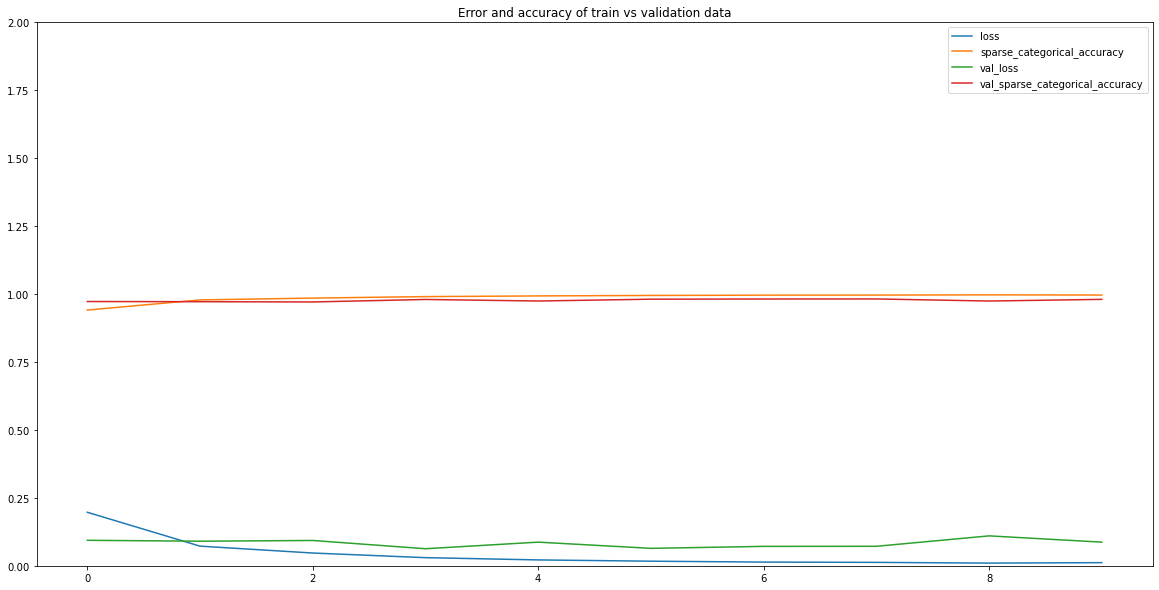

In [7]:
plot_history(history)